# Story Telling with Data using Python

This class will introduce users to some useful data wrangling features of Python package [Pandas](https://pandas.pydata.org/docs/index.html)"". Using the Center for Disease Control's (CDC) [National Outbreak Reporting System (NORS) data](https://data.cdc.gov/Foodborne-Waterborne-and-Related-Diseases/NORS/5xkq-dg7x/about_data)"", participants will see how Pandas will enable telling of stories and extraction of insights from data.

"The National Outbreak Reporting System (NORS) is a web-based platform designed to support reporting to CDC by local, state, and territorial health departments in the United States of all waterborne disease outbreaks and enteric disease outbreaks transmitted by food, contact with environmental sources, infected persons or animals, or unknown modes of transmission." -- [CDC](https://data.cdc.gov/Foodborne-Waterborne-and-Related-Diseases/NORS/5xkq-dg7x/about_data)""

## Questions to answer from CDC NORS dataset

There is a lot of information in the CDC NORS dataset for scientists to explore but this class will apply Python data wrangling techniques to answer the following.

* Which state had the highest illnesses?
* For the state with the highest number of reported illnesses, the following will be answered.
    * Which year had the highest illnesses, what caused it and how was it contracted?
    * What is the most common etiology causing illness and how is it transmitted?
    * Is there a trend in illnesses reported over the years?

## Learning objectives

After this class participants will:

* Have obtained concrete understanding of how data wrangling can be used to extract insight from data.
* Be able to perform data wrangling tasks such as importing tables, subsetting, and mathematical operations to draw conclusions from a dataset.

## Skills learned

* Import tabular data.
* View the structure of tabular data including dimensions, variables, and data types.
* Sort by variable.
* Group by variable.
* Perform mathematical operation.
* Subset.
* Create visualization.

In [1]:
# Importing packages

import pandas ## For data wrangling
import numpy  ## For numeric operation
import matplotlib.pyplot as plt  ## For data visualization
import seaborn ## For data visualization

Below the `read_csv` function of Pandas will be used to import the NORS data stored in the file `NORS_20250805.csv` into the work environment.

[!NOTE] 

Skill learned! 
Import of tabular data using Pandas.

In [2]:
# Import the CDC NORS dataset saved as NORS_20250805.csv

nors=pandas.read_csv("NORS_20250805.csv", low_memory=False)

:::{note}

Pandas can import and write to other formats of tabular data including tab delimited and Excel. For more information see the [Pandas section on input and output](https://pandas.pydata.org/docs/reference/io.html)"".

## Getting to Know the Structure of the NORS Data

The code below will use the `.info()` attribute of the data frame `nors` to find out what variables are in the NORS dataset.

:::{note}

In Pandas, attributes can be appended to the data frame to view information or perform certain task. This the convenient part of Python programming.

The results of .info() indicates that NORS data has 19 columns (variables) and 66,713 rows (observations). Variables include year, month, and state where an outbreak was documented. The source of the outbreak is also available.

:::{note} Skill learned
    
Understanding the structure of a dataset.

In [3]:
nors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66713 entries, 0 to 66712
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          66713 non-null  int64  
 1   Month                         66713 non-null  int64  
 2   State                         66713 non-null  object 
 3   Primary Mode                  66713 non-null  object 
 4   Etiology                      50375 non-null  object 
 5   Serotype or Genotype          16470 non-null  object 
 6   Etiology Status               50375 non-null  object 
 7   Setting                       60804 non-null  object 
 8   Illnesses                     66713 non-null  int64  
 9   Hospitalizations              58155 non-null  float64
 10  Info On Hospitalizations      58480 non-null  float64
 11  Deaths                        58785 non-null  float64
 12  Info On Deaths                58463 non-null  float64
 13  F

## Get a Glimpse of the NORS Data

The `.head()` attribute of a Pandas data frame can be used to view by default the first five rows of a data frame. This a good way to see what information the columns in a dataset contain. To view something other than the first five lines, just include a number within the `()` of `.head`. For instance, `.head(10)` will give the first 10 rows. Note that the first row is index with 0 because Python uses a zero-based index for arrays and data frames.

In [4]:
nors.head()

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,Info On Hospitalizations,Deaths,Info On Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type
0,2016,1,New Jersey,Food,NaN,NaN,NaN,NaN,47,0.0,47.0,0.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,9,Massachusetts,Person-to-person,Norovirus,NaN,Suspected,Other,41,0.0,41.0,0.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,1,Minnesota,Food,Norovirus Genogroup IX,GII.P15 GIX.1,Confirmed,Restaurant: Sit-down dining,23,0.0,23.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,1,Massachusetts,Indeterminate/unknown,Norovirus,NaN,Suspected,Long-term care/nursing home/assisted living fa...,7,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,1,North Carolina,Person-to-person,Norovirus unknown,NaN,Confirmed,Long-term care/nursing home/assisted living fa...,23,1.0,23.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN


## Sort Data Frame

The `nors` data frame is not sorted. The `.sort_values()` attribute can be used to do this. Inside `.sort_value()`, the option `by` will be used to sort the NORS data by the variable(s) of choice. This example sorts by year , month, and state (note these variables are supplied as a Python list enclosed in `[]`). The `inplace` option will be set to `True` so that the original table will be overwritten. Use `.head()` to view the first five lines of the sorted data frame.

:::{note} Skill learned!

Sorting a dataset by variables.

In [5]:
nors.sort_values(by=["Year", "Month", "State"], inplace=True)

In [6]:
nors_head_sorted=pandas.DataFrame(nors.head())
nors_head_sorted

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,Info On Hospitalizations,Deaths,Info On Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type
66693,1971,2,California,Water,Copper,NaN,Confirmed,Restaurant,2,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Drinking water,Community,NaN
66694,1971,6,Alabama,Water,Selenium,NaN,Confirmed,Unknown,3,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Drinking water,Individual/Private,NaN
66695,1971,6,Arkansas,Water,Hepatitis A,NaN,Confirmed,Store,98,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Drinking water,Other,NaN
66696,1971,6,Missouri,Water,Unknown,NaN,Suspected,Subdivision/Neighborhood,2,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Drinking water,Community,NaN
66697,1971,6,Oregon,Water,Unknown,NaN,Suspected,Restaurant,200,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Drinking water,Other,NaN


> What Years are Included in the NORS Data?

The code below will be used to find out. First, subset the Years column in the NORS data and use `.unique` to get the unique years where illnesses were reported. This will be written to data frame using `pandas.DataFrame` and saved as `nors_years_tracked`. Then the `columns` attribute will be used to assign the column name `NORS.years.tracked`. The result shows that the data set during the time of download contains outbreaks reported from 1971 to 2023.

In [7]:
nors_years_tracked=pandas.DataFrame(nors["Year"].unique())
nors_years_tracked.columns=["NORS.years.tracked"]
nors_years_tracked

,NORS.years.tracked
0,1971
1,1972
2,1973
3,1974
4,1975
5,1976
6,1977
7,1978
8,1979
9,1980


> Which State(s) was Inflicted with the Most Illnesses?

To answer this question, it will be necessary to group the NORS data by State and then sum the number of illnesses, hospitalizations, or deaths caused by an outbreak. Below are the data frame attributes that will accomplish this.

* The `.groupby` attribute can be used to group a dataset by variable. Include the variable(s) to group by in `()` and double quotes.
* Following `groupby`, the `[[]]` method will be used to subset `Illnesses` column from the NORS data.
* Next, the `.sum(axis=0)` is used to sum the illness incidences for each state.
* The `.sort_values` attribute will be used to sort the Illnesses column in descending order (by setting `ascending` to False).
* `.rename` will rename the column "Illnesses" to "Total.illnesses". Note that column name change is supplied to the `columns` argument in `rename` via a dictionary where the general syntax is `{"Old.column.name" : "New.column.name}`.
* `.reset_index()` will provide the output as a data frame with the `State` and `Illnesses` columns and finally, `.head(3)` will just show the top three states in terms of total illnesses reported.

:::{note} Skills learned!

Group by, sum, and sort by variable.

In [8]:
nors.groupby("State")[["Illnesses"]].sum() \
    .sort_values(by="Illnesses", ascending=False) \
    .reset_index().rename(columns={"Illnesses" : "Total.illnesses"}).head(3)

,State,Total.illnesses
0,Wisconsin,502652
1,Pennsylvania,120266
2,New York,107237


It appears that Wisconsin had the highest document cases of illnesses from environmental exposure. The code below took a deeper dive into the illnesses and etiology in the state of Wisconsin. Apparently, 403,000 were affected from the parasite Cryptosporidium parvum outbreak in 1993 in Milwaukee. See [A massive outbreak in Milwaukee of cryptosporidium infection transmitted through the public water supply](https://pubmed.ncbi.nlm.nih.gov/7818640/)"" for details.

In the code below:

* The state of Wisconsin is subsetted from the NORS data by using `[]` (bracket) notation.
  * `nors[nors["State"]=="Wisconsin"]` extracts information for Wisconsin.
  * Next, the Year, Month, State, Illnesses, and Etiology columns are extracted using `[[]]`, which will present results in data frame format.
  * `.sort_values` will be used to sort illness number from highest to lowest.
* The results will be saved as a data frame called `wisconsin_illnesses`.

:::{note} Skills learned!   

Subsetting and sorting by variable.    

In [9]:
wisconsin_illnesses=nors[nors["State"]=="Wisconsin"][["Year", "Month", "State", "Illnesses", "Etiology"]] \
    .sort_values(by="Illnesses", ascending=False)

In [10]:
wisconsin_illnesses.head()

,Year,Month,State,Illnesses,Etiology
65820,1993,3,Wisconsin,403000,Cryptosporidium parvum
15122,2018,1,Wisconsin,1200,Norovirus
62279,2000,7,Wisconsin,736,"Escherichia coli, Shiga toxin-producing"
56479,2004,2,Wisconsin,380,Norovirus Genogroup I
50444,2009,3,Wisconsin,352,Norovirus Genogroup II


As a sanity check, sum the total illnesses reported each year to make sure 1993 was the highest. To do this:

* Group `wisconsin_illnesses` by year.
* Subset the Illnesses column using bracket notation.
* Use `.sum()` to add up the illness cases fore each year.
* In the result, use `rename` to change Illnesses to Total.illnesses.
* Reset the data frame index and sort the total illnesses from highest to lowest.

Indeed, in 1993, there were over 403,000 illnesses reported in Wisconsin.

In [11]:
wisconsin_illnesses.groupby("Year")[["Illnesses"]].sum(). \
rename(columns={"Illnesses": "Total.illnesses"}).reset_index(). \
sort_values(by="Total.illnesses", ascending=False)

,Year,Total.illnesses
14,1993,403174
30,2011,8790
31,2012,7620
29,2010,7390
34,2015,7346
36,2017,7279
37,2018,6814
32,2013,6759
35,2016,6553
33,2014,6521


> What Caused the 1993 Wisconsin Cryptosporidium parvum Outbreak

The results above indicates that in 1993, a Cyrptosporidium parvum outbreak occured in Wisconsin contributing to 403,000 illnesses. What caused the Cryptosporidium parvum outbreak (ie. what was the environmental exposure)? To do this, subset out the state of Wisconsin data from 1993 where the etiology is Cryptosporidium parvum using the code below. The results show that the Cryptosporidium outbreaks were water borne and illnesses occuring due to drinking water exposure caused all of the 50 deaths while those contracted from recreational water (ie. swimming pools) did not cause deaths.  

:::{note} Skill learned!

Subsetting   

In [12]:
nors[(nors["State"]=="Wisconsin") & (nors["Year"]==1993) \
    & (nors["Etiology"]=='Cryptosporidium parvum')]

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,Info On Hospitalizations,Deaths,Info On Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type
65820,1993,3,Wisconsin,Water,Cryptosporidium parvum,NaN,Confirmed,Community/municipality,403000,NaN,NaN,50.0,NaN,NaN,NaN,NaN,Drinking water,Community,NaN
65823,1993,4,Wisconsin,Water,Cryptosporidium parvum,NaN,Confirmed,Hotel/motel,51,3.0,NaN,0.0,NaN,NaN,NaN,NaN,Recreational water -- treated,Pool - Other Swimming Pool,NaN
65835,1993,8,Wisconsin,Water,Cryptosporidium parvum,NaN,Confirmed,Community/municipality,5,0.0,NaN,0.0,NaN,NaN,NaN,NaN,Recreational water -- treated,Pool - Other Swimming Pool,NaN
65836,1993,8,Wisconsin,Water,Cryptosporidium parvum,NaN,Confirmed,Community/municipality,54,0.0,NaN,0.0,NaN,NaN,NaN,NaN,Recreational water -- treated,Pool - Other Swimming Pool,NaN
65837,1993,8,Wisconsin,Water,Cryptosporidium parvum,NaN,Confirmed,Hotel/motel,64,1.0,NaN,0.0,NaN,NaN,NaN,NaN,Recreational water -- treated,Pool - Other Swimming Pool,NaN


> What is the Most Common Cause of Illness in Wisconsin?

To find the most common cause of illness in Wisconsin, the code below will be used.

* Subset out the Etiology column from wisconsin_illnesses and keep only those that are not N/A by applying the `.notnull()` attribute. The results of this will be saved as `wisconsin_etiology`.
* Use `apply` and the `lambda` function to split the cells with multiple etiologies that are separated by ';' (`split` will be used to separate each value) and then `explode` will write each etiology into its own row. The results will be saved as the data frame (using `pandas.DataFrame`) `wisconsin_etiology_expanded`. 
* Finally, group by etiology in `wisconsin_etiology_expanded`, count the occurences of each and sort from highest to lowest.

:::{note} Skills learned!
    
Remove NA values from subsetted data frame column and applied a function to a data frame column.

In [13]:
wisconsin_etiology=wisconsin_illnesses[wisconsin_illnesses["Etiology"].notnull()]
wisconsin_etiology_expanded=pandas.DataFrame(wisconsin_etiology["Etiology"].apply(lambda x: x.split(';')).explode())
wisconsin_etiology_expanded

,Etiology
65820,Cryptosporidium parvum
15122,Norovirus
62279,"Escherichia coli, Shiga toxin-producing"
56479,Norovirus Genogroup I
50444,Norovirus Genogroup II
...,...
29408,"Escherichia coli, Shiga toxin-producing"
59075,Norovirus Genogroup I
17454,"Escherichia coli, Shiga toxin-producing"
65102,Mycotoxins


Now that each illness causing etiology is listed in its own row and stored in the data frame `wisconsin_etiology_expanded` just group by etiology, count, and sort from highest to lowest to determine which cause of illness appeared the most. Store the results in data frame `wisconsin_etiology_ranked` and it appears that Norovirus causes a lot of illnesses.

In [14]:
wisconsin_etiology_ranked=pandas.DataFrame(wisconsin_etiology_expanded.groupby("Etiology")[["Etiology"]].count(). \
rename(columns={"Etiology": "Counts"}).reset_index().\
sort_values(by="Counts", ascending=False))
wisconsin_etiology_ranked

,Etiology,Counts
37,Norovirus Genogroup II,1429
41,Norovirus unknown,920
36,Norovirus Genogroup I,345
50,Salmonella enterica,120
12,Clostridium perfringens,71
...,...,...
11,Clostridium other,1
9,Ciguatoxin,1
7,Chlorine,1
6,Chloramines,1


While generating the above table with the occurences of each etiology in Wiscosin is useful, this result can be better interpreted using a visualization. Pandas is capable of plotting as well (see [https://pandas.pydata.org/docs/user_guide/visualization.html](https://pandas.pydata.org/docs/user_guide/visualization.html)"".

The code below will generate a scatter plot of the etiology counts in the data frame `wisconsin_etiology_ranked`. In the code below:

* `plt.rcParams` will be used to set the figure size in pixels (in this case it will 1280 by 720). `plt` is the alias form `maptlotlib's` `pyplot` module as imported earlier.
* `.plot.scatter` will be used to make a scatter plot from `wisconsin_etiology_ranked`. The x-axis will contain the etiology and the y-axis will contain counts (i.e. number of occurences for each etiology).
* `plt.xticks` is used to adjust the aesthetics of the x-axis including rotating the tick labels to 90 degrees (`rotation`) and changing the font size (`size`).
* `plt.ylabel` is used to change the y-axis label to "Number of occurences".
* `plt.show()` will display the plot.

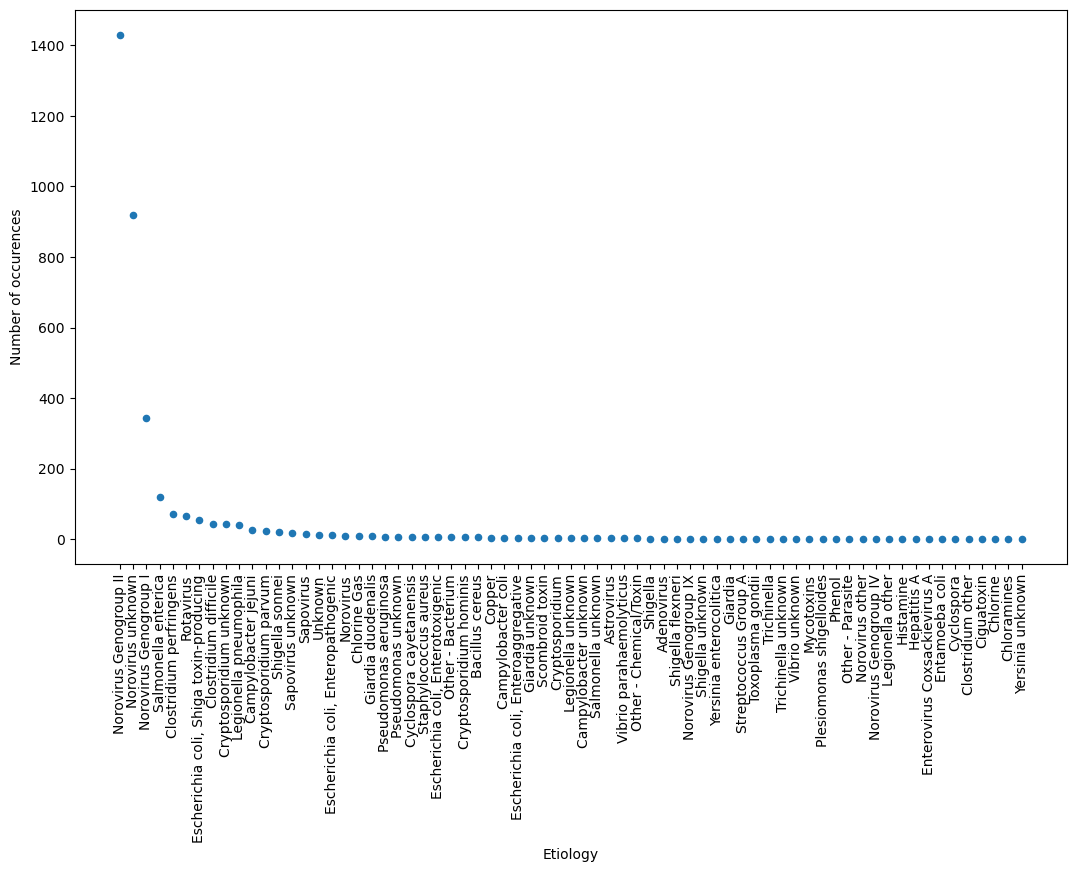

In [15]:
plt.rcParams['figure.figsize'] = (12.8, 7.2)
wisconsin_etiology_ranked.plot.scatter(x="Etiology", y="Counts")
plt.xticks(rotation=90, size=10)
plt.ylabel("Number of occurences")
plt.show()

> Is There a Trend for Total Illnesses in Wisconsin over the Years?

Is there a Trend for Total Illnesses in Wisconsin over the years?
This question can be best answered by counting the illness incidents by year in the state of Wisconsin and constructing a categorical or catplot using Seaborn. The catplot in this example is scatter plot with year treated as categorical variable on the x-values.

The total illness by year information in Wisconsin will be stored as a new data frame `wisconsin_total_illness_by_year`. Here, the data frame `wisconsin_illnesses` will be grouped by "Year" (using `.groupby("Year")`). Next, the "Illnesses" column is subsetted ([["Illnesses"]]). The rename(columns={"Illnesses" : "Total.illnesses"}) renames "Illnesses" to "Total.illnesses". The index is then reset via `reset_index()`.

:::{note} Skills learned!

Group by variable, perform mathematical operation, and create data visualization.

In [16]:
wisconsin_total_illness_by_year=wisconsin_illnesses.groupby("Year")[["Illnesses"]] \
.sum().rename(columns={"Illnesses" : "Total.illnesses"}).reset_index()

To visualize illness trends by the year Wisconsin, the `catplot` function of Seaborn will be called using `seaborn.catplot` and within parentheses, the following are provieded.

* Data to plot (ie. `wisconsin_total_illness_by_year`)
* X value (ie. "Year")
* Y value log10 of the "Total.illnesses" (`numpy's` `log10` function) for better visualization as the illness incidents from 1993 might skew the plot.

Next, Matplotlib will be used to adjust the following aesthetics of the plot.

* `plt.xticks(rotation=90,size=8)` adjust the x axis tick labels to rotate to 90 degrees and shrinks the font size to 8.
* `plt.ylabel("Total Illnesses (log10)")` changes the y axis label to ""Total Illnesses (log10)" to indicate that the results are on the log10 scale.
* `plt.show()` to display the plot.

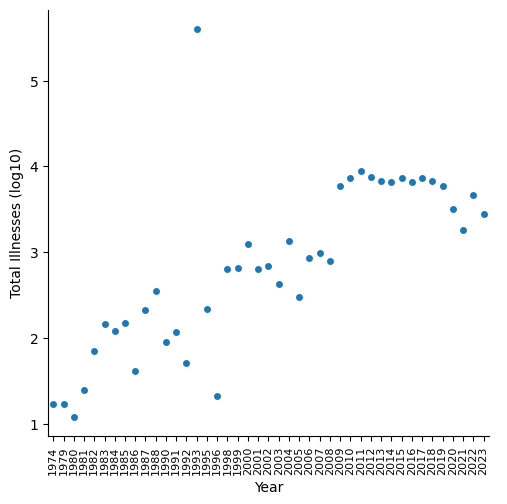

In [17]:
seaborn.catplot(wisconsin_total_illness_by_year, x="Year", \
                    y=numpy.log10(wisconsin_total_illness_by_year["Total.illnesses"]))
plt.xticks(rotation=90,size=8)
plt.ylabel("Total Illnesses (log10)")
plt.show()

## Conclusion

This data exploration exercise revealed that Wisconsin had the highest number of reported illnesses in the NORS data. The main contributor is the 1993 Cryptosporidium parvum outbreak that caused over 400,000 illnesses. Despite this, Norovirus geno group II seems to be the most commonly occuring cause of illnesses in the state. Finally, perhaps due to technology that facilitated outbreak reporting, the number of illnesses reported over the years has increased.